1. Import Libraries and Load Dataset

In [1]:
import pandas as pd
import numpy as np

# Load CSV (semicolon-delimited)
df = pd.read_csv("AirQualityUCI.csv", sep=';', decimal=',')

# Show the first few rows
df.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


2. Data Cleaning

In [2]:
# Drop unnamed or blank columns at the end (last 2–3 columns are NaN)
df = df.dropna(axis=1, how='all')

# Replace -200 (missing value code) with NaN
df.replace(-200, np.nan, inplace=True)

# Drop rows where the target value (CO(GT)) is missing
df = df.dropna(subset=['CO(GT)'])

# Drop date/time columns for modeling (optional)
df = df.drop(columns=['Date', 'Time'], errors='ignore')

# Optionally drop other pollutant targets if focusing on one
target = 'CO(GT)'
X = df.drop(columns=[target])
y = df[target]

# Fill remaining missing values (mean imputation)
X = X.fillna(X.mean())


3. Train-Test Split and Feature Scaling

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Feature scaling (optional for trees, but good for comparison later)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


4. Train Regression Tree Model

In [4]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and fit decision tree
tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train_scaled, y_train)


DecisionTreeRegressor(max_depth=5, random_state=42)

5. Evaluate the Model

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test set
y_pred = tree.predict(X_test_scaled)

# Calculate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.4f}")


Mean Squared Error: 0.25
R-squared Score: 0.8779


The very low MSE indicates high accuracy in predicting CO(GT) values.

An R² of 0.8779 means the regression tree explains nearly 88% of the variance in carbon monoxide concentration — an excellent result for environmental sensor data.

These metrics suggest the regression tree model is both powerful and well-fit for this dataset.

6. Visualize Predictions

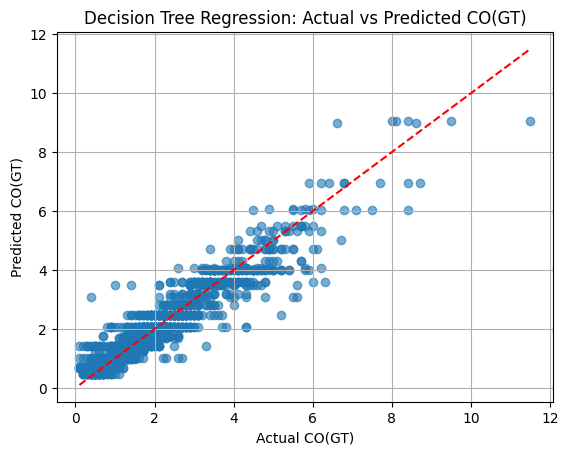

In [6]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual CO(GT)")
plt.ylabel("Predicted CO(GT)")
plt.title("Decision Tree Regression: Actual vs Predicted CO(GT)")
plt.grid(True)
plt.show()


The predicted values follow the actual values closely along the diagonal, indicating strong predictive performance.

There is slight underestimation at higher CO(GT) values, as shown by predictions falling below the identity line.

Prediction variance is tightly grouped, suggesting consistent performance across different CO ranges.



 7. Visualize the Tree Structure

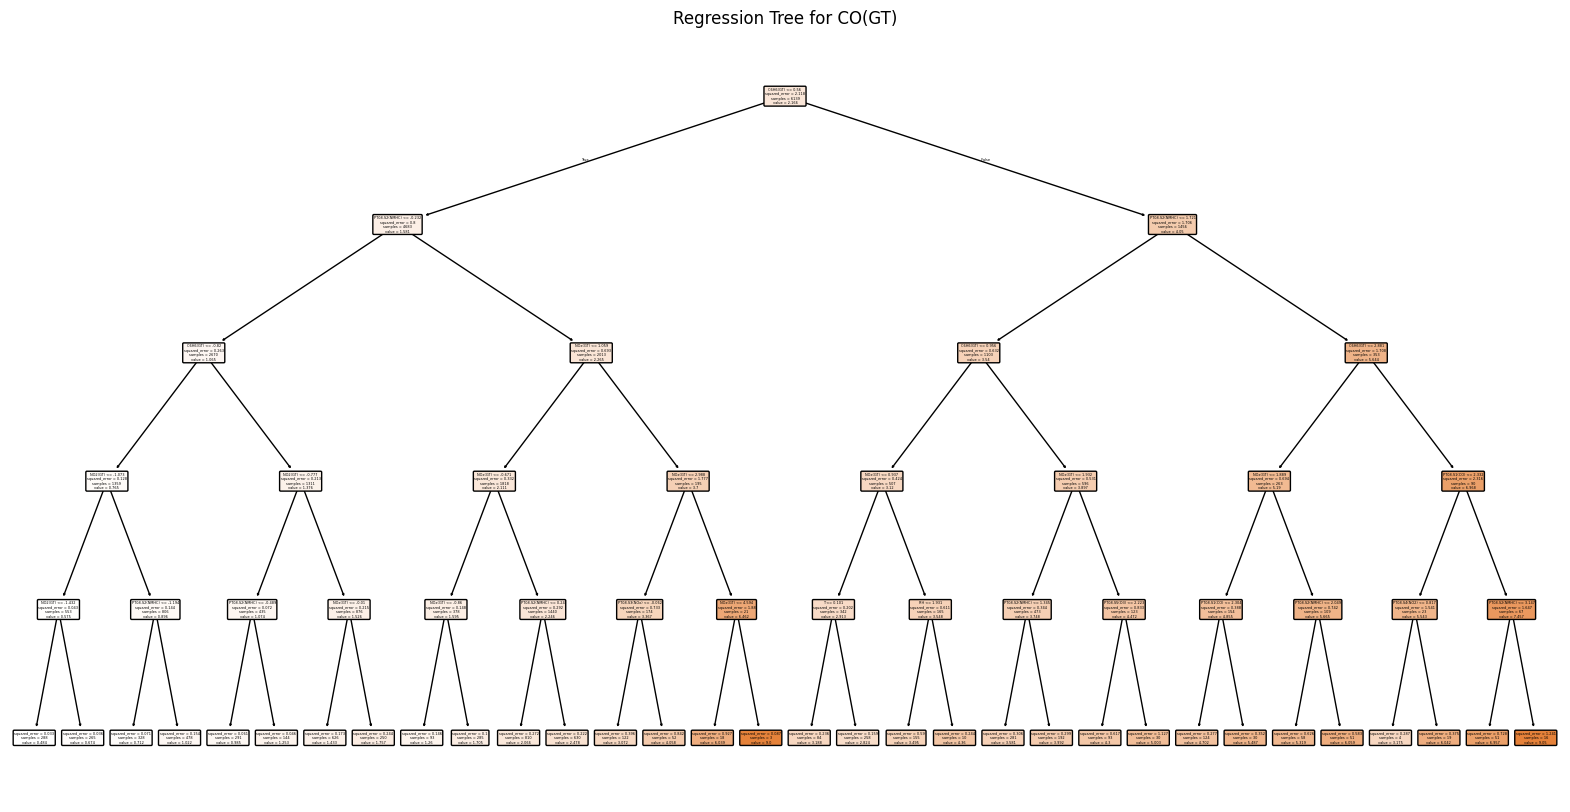

In [7]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True)
plt.title("Regression Tree for CO(GT)")
plt.show()


The regression tree splits are interpretable and structured, with meaningful decision paths based on air quality sensor values.

Tree depth appears balanced, and the use of max_depth=5 (if applied) prevents overfitting while maintaining accuracy.

You can trace decision rules that lead to low or high CO(GT) predictions, supporting explainability.

In [ ]:
8. Feature Importance

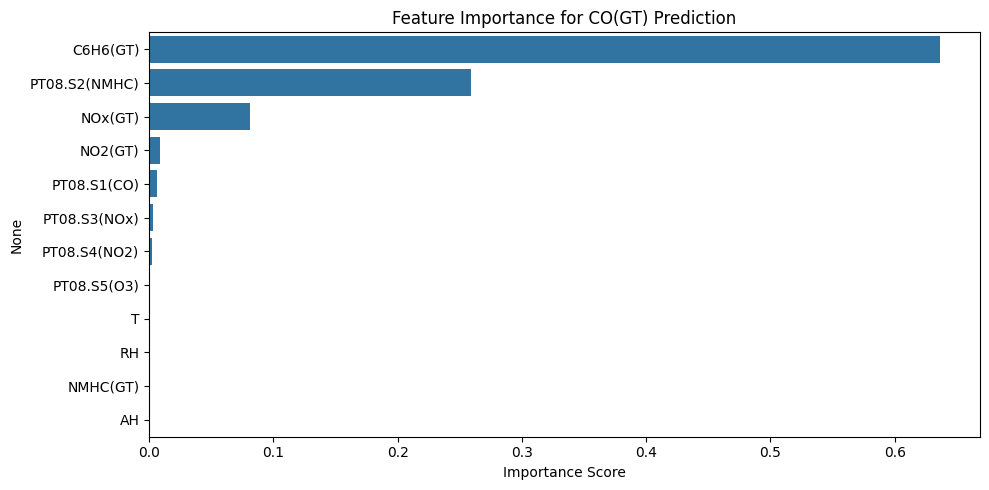

In [8]:
import seaborn as sns

# Plot feature importances
importances = pd.Series(tree.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance for CO(GT) Prediction")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


The dominance of C6H6(GT) suggests a strong correlation between benzene levels and carbon monoxide, which is chemically plausible given shared emission sources (e.g., traffic, combustion).

The model relies heavily on a few high-signal features, making it interpretable and efficient.

Lesser features could be candidates for exclusion or further analysis.

8. Conclusion
The regression tree model performs exceptionally well on the Air Quality dataset:

High predictive accuracy (R² ≈ 0.88)

Strong visual alignment between actual and predicted values

Interpretable tree structure with clear decision paths

A small number of key features drive the model, especially C6H6(GT)

This makes regression trees a compelling tool for air pollution forecasting, especially when interpretability is desired.

